In [1]:
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("Default_Fin.csv")

In [4]:
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [5]:
df=df.dropna()

In [6]:
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [7]:
df["Defaulted?"].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

In [8]:
cor=df.corr()
cor

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
Index,1.000000,-0.002597,0.010342,-0.001427,-0.005135
Employed,-0.002597,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,0.010342,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,-0.001427,0.753985,-0.152243,1.000000,-0.019871
Defaulted?,-0.005135,-0.035420,0.350119,-0.019871,1.000000


<AxesSubplot:>

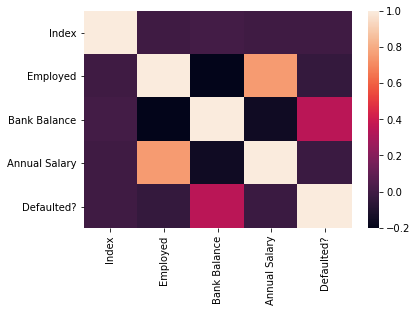

In [9]:
sns.heatmap(cor)

In [10]:
X = df.drop(['Defaulted?'], axis="columns")
Y = df["Defaulted?"]

In [11]:
x = df[["Employed", "Annual Salary","Bank Balance"]]
y=df["Defaulted?"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state = 0)

In [13]:
logi = LogisticRegression()

In [14]:
x_train=x_train.drop(["Index"],axis="columns")

In [15]:
log_reg=logi.fit(x_train , y_train)

In [16]:
x_test=x_test.drop(['Index'],axis=1)

In [17]:
y_true=log_reg.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_true)

0.962

In [19]:
cm=confusion_matrix(y_test,y_true)
print(cm)

[[2886    1]
 [ 113    0]]


In [20]:
cr=classification_report(y_test,y_true)

In [21]:
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2887
           1       0.00      0.00      0.00       113

    accuracy                           0.96      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.93      0.96      0.94      3000



In [22]:
df['Defaulted?'].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

<AxesSubplot:xlabel='Defaulted?', ylabel='count'>

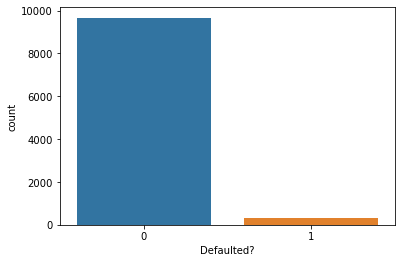

In [23]:
sns.countplot(x='Defaulted?',data=df)

In [24]:
sm = SMOTE(random_state=55)
X_res, y_res = sm.fit_resample(x_train, y_train)

In [25]:
model=logi.fit(X_res,y_res)

In [26]:
pred=model.predict(x_test)

In [27]:
confusion_matrix(y_test,pred)

array([[1897,  990],
       [  21,   92]], dtype=int64)

In [28]:
cr1=classification_report(y_test,pred)

In [29]:
print(cr1)

              precision    recall  f1-score   support

           0       0.99      0.66      0.79      2887
           1       0.09      0.81      0.15       113

    accuracy                           0.66      3000
   macro avg       0.54      0.74      0.47      3000
weighted avg       0.95      0.66      0.77      3000



In [30]:
y_prob=model.predict_proba(x_test)

In [31]:
dff=pd.DataFrame(y_prob)
dff['pred']=pred
dff['true']=y_test

In [32]:
r=[]
for i in range(3000):
    r.append(i)

In [33]:
y_true=pd.DataFrame(y_test)
y_true['ro']=r
y_true=y_true.set_index(y_true['ro'])
y_true=y_true.drop('ro',axis=1)
dff['true']=y_true

In [34]:
dff.tail(45)

,0,1,pred,true
2955,0.901473,0.098527,0,0
2956,0.840552,0.159448,0,0
2957,0.699826,0.300174,0,0
2958,0.869661,0.130339,0,0
2959,0.705470,0.294530,0,0
2960,0.432141,0.567859,1,0
2961,0.873139,0.126861,0,0
2962,0.508151,0.491849,0,0
2963,0.054484,0.945516,1,0
2964,0.832766,0.167234,0,0


In [35]:
cm1=confusion_matrix(y_test,pred)
print(cm1)

[[1897  990]
 [  21   92]]


In [36]:
print(cm)

[[2886    1]
 [ 113    0]]


In [37]:
print(cr,cr1)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2887
           1       0.00      0.00      0.00       113

    accuracy                           0.96      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.93      0.96      0.94      3000
               precision    recall  f1-score   support

           0       0.99      0.66      0.79      2887
           1       0.09      0.81      0.15       113

    accuracy                           0.66      3000
   macro avg       0.54      0.74      0.47      3000
weighted avg       0.95      0.66      0.77      3000

